In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# Update the path to your actual file
data = pd.read_csv('/content/drive/MyDrive/Collab files/Semester 4/Capstone Data/Capstone Final Dataset.csv')
data.head()

,Date,Ordered Product Sales,Units Ordered,Order Items,Page Views,Sessions,Featured Offer (Buy Box) Percentage,Unit Session Percentage,Adspend,Ad sales,ACOS,ROAS,TACOS
0,3/24/2023,$189.96,4,2,144,113,100.00%,3.54%,$25.00,$188.00,13.30%,$7.52,13.16%
1,3/25/2023,$800.78,22,15,141,111,97.87%,19.82%,$17.00,$60.00,28.33%,$3.53,2.12%
2,3/26/2023,$299.89,11,10,156,121,100.00%,9.09%,$19.00,$20.00,95.00%,$1.05,6.34%
3,3/27/2023,"$1,007.71",29,21,170,132,98.82%,21.97%,$18.00,$109.00,16.51%,$6.06,1.79%
4,3/28/2023,$988.72,28,21,160,130,99.38%,21.54%,$22.00,$396.00,5.56%,$18.00,2.23%


In [ ]:
data['Adspend'] = data['Adspend'].replace('[\$,]', '', regex=True).astype(float)
data['Ad sales'] = data['Ad sales'].replace('[\$,]', '', regex=True).astype(float)
data['ROAS'] = data['ROAS'].replace('[\$,]', '', regex=True).astype(float)
data['Ordered Product Sales'] = data['Ordered Product Sales'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
data['ACOS'] = data['ACOS'].replace('%', '', regex=True).astype(float)
data['TACOS'] = data['TACOS'].replace('%', '', regex=True).astype(float)
data['Unit Session Percentage'] = data['Unit Session Percentage'].replace('%', '', regex=True).astype(float)
data['Featured Offer (Buy Box) Percentage'] = data['Featured Offer (Buy Box) Percentage'].replace('%', '', regex=True).astype(float)

In [ ]:
data = data.drop(columns=['Order Items'])

In [ ]:
data.head()

,Date,Ordered Product Sales,Units Ordered,Page Views,Sessions,Featured Offer (Buy Box) Percentage,Unit Session Percentage,Adspend,Ad sales,ACOS,ROAS,TACOS
0,3/24/2023,189.96,4,144,113,100.00,3.54,25.0,188.0,13.30,7.52,13.16
1,3/25/2023,800.78,22,141,111,97.87,19.82,17.0,60.0,28.33,3.53,2.12
2,3/26/2023,299.89,11,156,121,100.00,9.09,19.0,20.0,95.00,1.05,6.34
3,3/27/2023,1007.71,29,170,132,98.82,21.97,18.0,109.0,16.51,6.06,1.79
4,3/28/2023,988.72,28,160,130,99.38,21.54,22.0,396.0,5.56,18.00,2.23


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 730 non-null    object 
 1   Ordered Product Sales                730 non-null    float64
 2   Units Ordered                        730 non-null    int64  
 3   Page Views                           730 non-null    object 
 4   Sessions                             730 non-null    int64  
 5   Featured Offer (Buy Box) Percentage  730 non-null    float64
 6   Unit Session Percentage              730 non-null    float64
 7   Adspend                              730 non-null    float64
 8   Ad sales                             730 non-null    float64
 9   ACOS                                 730 non-null    float64
 10  ROAS                                 730 non-null    float64
 11  TACOS                           

In [ ]:
print(data.columns.tolist())


['Date', 'Ordered Product Sales', 'Units Ordered', 'Page Views', 'Sessions ', 'Featured Offer (Buy Box) Percentage', 'Unit Session Percentage', 'Adspend', 'Ad sales', 'ACOS', 'ROAS', 'TACOS']


In [ ]:
data.columns = data.columns.str.strip()

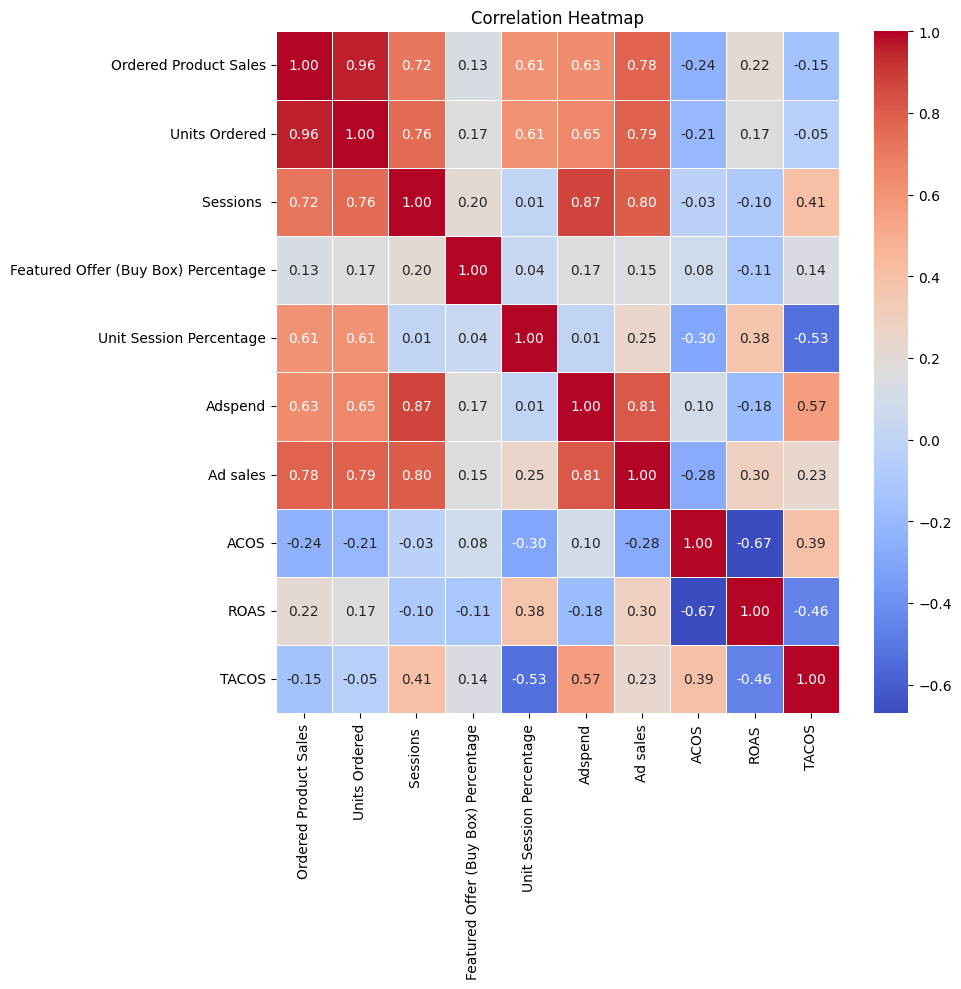

In [ ]:

# Drop non-numeric columns (like 'Date') before computing correlation
numeric_data = data.select_dtypes(include=['number'])

# Create and plot correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Clean column names
data.columns = data.columns.str.strip()

# Updated features and target
features = ['Ad sales', 'Adspend', 'Sessions', 'Unit Session Percentage']
target = 'Ordered Product Sales'

X = data[features]
y = data[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Huber Regressor
huber = HuberRegressor()
huber.fit(X_train, y_train)

# Predictions
y_pred = huber.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 69357.63550688997
R² Score: 0.8753656199445825


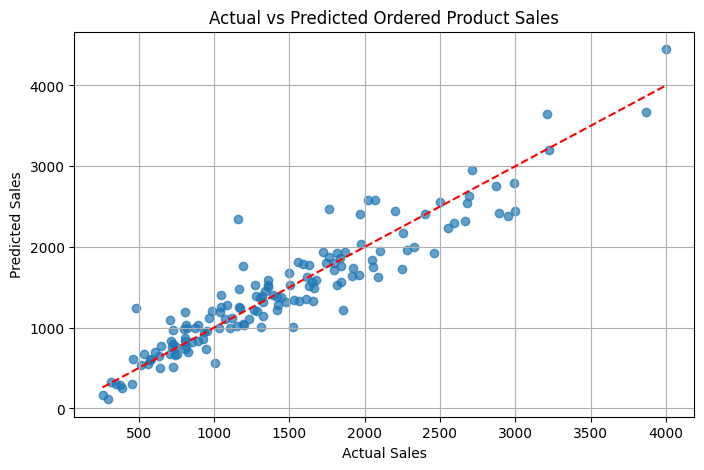

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Ordered Product Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


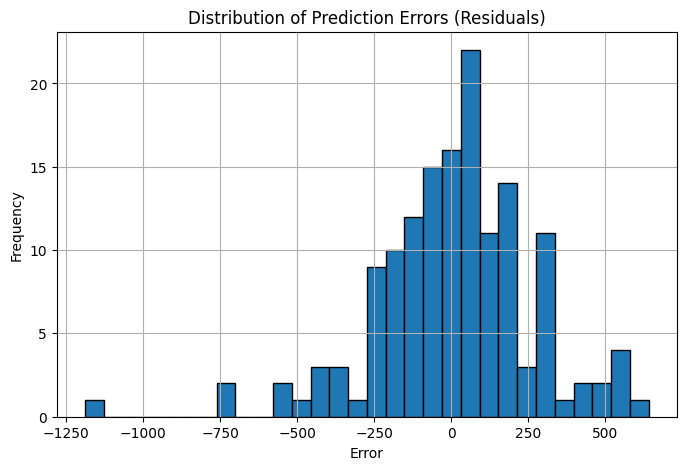

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
for feature, coef in zip(features, huber.coef_):
    print(f"{feature}: {coef}")


Ad sales: 0.4750932137261996
Adspend: -0.6003375543127862
Sessions: 4.096781362115974
Unit Session Percentage: 49.899471809347496


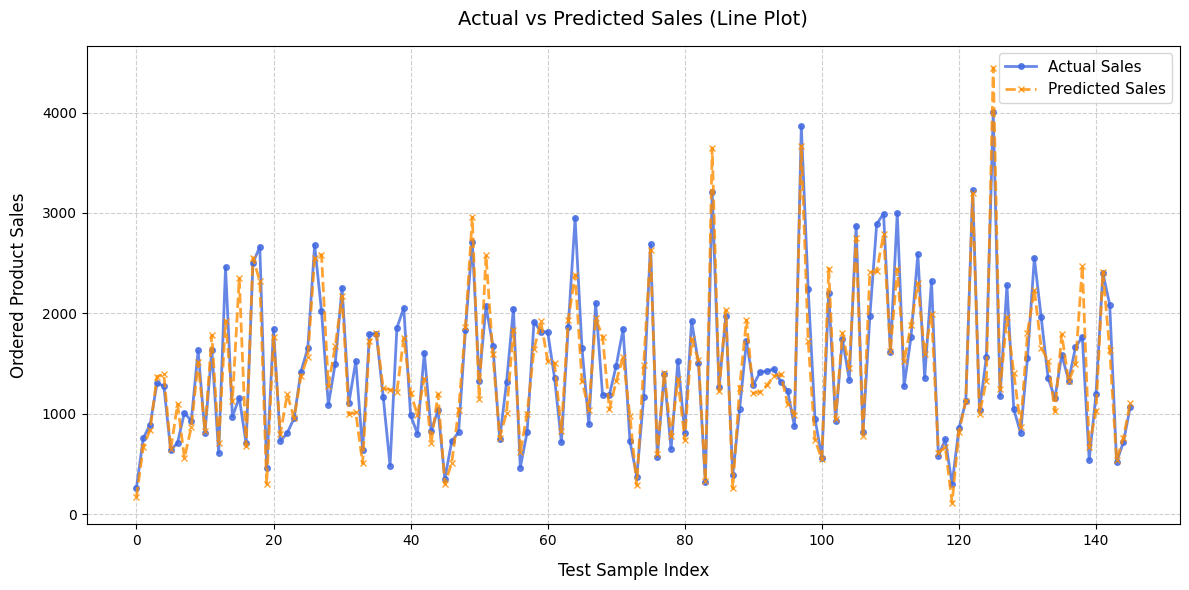

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Align indices
y_test_series = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_series, label='Actual Sales', color='royalblue', linewidth=2, marker='o', markersize=4, alpha=0.8)
plt.plot(y_pred_series, label='Predicted Sales', color='darkorange', linewidth=2, linestyle='--', marker='x', markersize=4, alpha=0.8)

# Labels and styling
plt.xlabel('Test Sample Index', fontsize=12, labelpad=10)
plt.ylabel('Ordered Product Sales', fontsize=12, labelpad=10)
plt.title('Actual vs Predicted Sales (Line Plot)', fontsize=14, pad=15)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:

sample_input_df = pd.DataFrame([{
    'Ad sales': 200.0,
    'Adspend': 35.0,
    'Sessions': 120.0,
    'Unit Session Percentage': 12.5
}])

predicted_sales = huber.predict(sample_input_df)[0]
print(f"🔮 Predicted Ordered Product Sales: {predicted_sales:.2f}")


🔮 Predicted Ordered Product Sales: 356.41


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(huber, 'huber_sales_model.pkl')


['huber_sales_model.pkl']

In [ ]:
from google.colab import files
files.download('huber_sales_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>